# Surface energy balance

## Surface energy balance closure
The surface energy balance (SEB) is a framework to describe exchange processes between atmosphere and land, and can be written as
			$$
				R_{net} - G  = SH + LH + I_{SEB}			
			$$
with net radiation $R_{net} = SW\downarrow - SW\uparrow + LW\downarrow - LW\uparrow$ (combining shortwave (SW) and longwave (LW), incoming ($\downarrow$) and outgoing ($\uparrow$) radiative fluxes) and the ground heat flux $G$. The turbulent fluxes are given by
			\begin{align}
				SH = \rho c_p \overline{w'T'} \quad \textrm{  and  } \quad LH = \rho L_v \overline{w'q'}
			\end{align}
			with the air density $\rho$, the heat capacity of air (under constant pressure) $c_p$ and the latent heat of vaporization $L_v$. The sensible heat flux SH is positive under unstable conditions (ground heats atmosphere) and negative under stable conditions (atmosphere heats ground). 
			Positive latent heat fluxes (LH) represent evaporation or transpiration, whereas negative LH indicates condensation or deposition of water (vapor).
			The last term $I_{SEB}$ describes the imbalance (or residual flux). Depending on the value of $I_{SEB}$, the SEB is called closed or unclosed
			\begin{align}
				I_{SEB} \begin{cases}
					= 0 \rightarrow \textrm{closed} \\
					\ne 0 \rightarrow \textrm{unclosed}
				\end{cases}
			\quad \textrm{and} \quad
			CR := \frac{R_{net}-G}{SH+LH} \begin{cases}
				= 1 \rightarrow \textrm{closed} \\
				\ne 1 \rightarrow \textrm{unclosed},
			\end{cases}	
			\end{align}
			which can also be expressed in a relative measure, the closure ratio CR. The advantage of the closure ratio is the normalization by the available radiation, but the disadvantage is a cancellation of biases. @Wilson2002 showed based on the FLUXNET towers, that there is on average a SEB unclosure of 20-30 \%. Reasons for the unclosure are (similar to the TKE budget unclosure) horizontal advection, flux divergence, submeso-scale motions, different measurement footprints, melting, runoff or rain fluxes, canopy interactions as well as possible measurement and post-processing errors (as in great detail reviewed by @Mauder2020). @Stoy2013 found a larger unclosure in heterogeneous terrain and a correlation with friction velocity. 

## Calculating surface energy balance

In [1]:
#loading Reddy package
#install.packages("../src/Reddy_0.0.0.9000.tar.gz",repos=NULL,source=TRUE,quiet=TRUE)
library(Reddy)
library(dplyr)

#read in processed example data
dat=readRDS("../data/ec-data_30min_processed/processed_data_example.rds")
dat$TIME=as.POSIXct(dat$time,format="%F %T")


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




**Plotting of surface energy balance with `plot_seb`** <br>
The function `plot_seb`plots the surface energy balance as time series and as scatter plot (R-GH, SH+LH) with linear regression as well as calculates the residual flux and the closure ratio. In addition to the turbulence data used so far (which contains the two turbulent fluxes `SH, LH`), we now also need additional radiative measurements (all four radiative fluxes `SWin, SWout, LWin, LWout`) and the ground heat flux (`GH`), which are available in the file `../data/radiation-data_30min/biomet_data.csv` as 30 minutes averages.

In [2]:
#read in radiation data
dat_rad=read.table("../data//radiation-data_30min//biomet_data.csv",sep=",",header=T)
colnames(dat_rad)=c("time","rh","ta","swin","swout","lwin","lwout","shf1","shf2")
dat_rad$TIME=as.POSIXct(dat_rad$time,format="%F %T")

In [3]:
dat=inner_join(dat,dat_rad,by="TIME")
head(dat)

,time.x,u_mean,v_mean,w_mean,ws_mean,wd_mean,T_mean,h2o_mean,co2_mean,u_sd,⋯,TIME,time.y,rh,ta,swin,swout,lwin,lwout,shf1,shf2
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dttm>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2018-07-20 08:30:00,2.872084,0.3645577,0.1206889,2.873170,48.83370,15.86938,0.007254132,0.0006009614,1.062143,⋯,2018-07-20 08:30:00,2018-07-20 08:30:00,56.54792,16.28775,715.4410,105.7314,312.4243,458.7009,21.59691,1.682706
2,2018-07-20 09:00:00,2.864793,0.3848472,0.1330429,2.864538,46.72741,16.55190,0.007584267,0.0005978138,1.105122,⋯,2018-07-20 09:00:00,2018-07-20 09:00:00,54.34070,16.77433,756.2658,109.9171,319.3567,460.9099,26.81290,1.952374
3,2018-07-20 09:30:00,3.996526,0.4702586,0.1505031,4.002522,63.38033,17.05704,0.007472065,0.0005954894,1.409495,⋯,2018-07-20 09:30:00,2018-07-20 09:30:00,47.65451,17.40209,797.9751,112.8786,301.3082,463.2456,30.59997,2.139507
4,2018-07-20 10:00:00,4.998016,0.6313088,0.1684323,4.997530,66.68404,17.60447,0.006762097,0.0005953881,1.289326,⋯,2018-07-20 10:00:00,2018-07-20 10:00:00,36.98989,18.08719,809.7048,114.7406,295.6089,467.7517,33.01136,2.270067
5,2018-07-20 10:30:00,4.879095,0.5967435,0.1828934,4.880696,64.57826,18.08994,0.005410862,0.0005948927,1.469949,⋯,2018-07-20 10:30:00,2018-07-20 10:30:00,30.13753,18.32750,823.0150,117.3849,291.3130,469.1732,34.70869,2.299792
6,2018-07-20 11:00:00,5.225037,0.6579993,0.1693293,5.223984,50.44251,18.24207,0.004422858,0.0005954766,1.319227,⋯,2018-07-20 11:00:00,2018-07-20 11:00:00,25.45414,18.60887,827.8588,118.4659,288.2217,467.7229,34.78918,2.284315


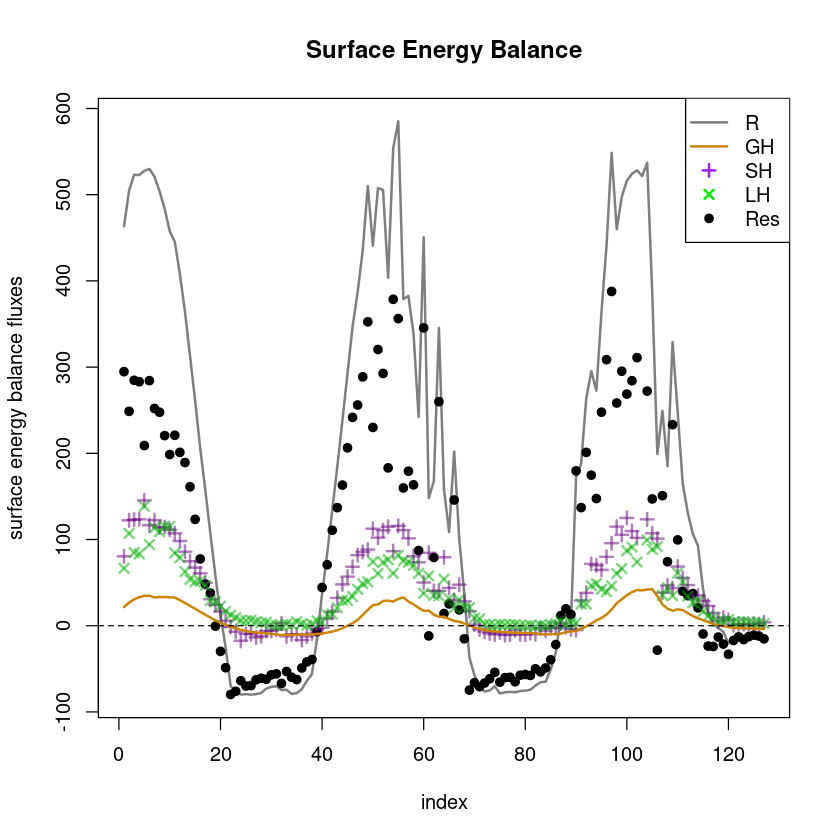


Call:
lm(formula = y ~ x)

Residuals:
    Min      1Q  Median      3Q     Max 
-85.659 -11.834  -1.481  15.184 115.288 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 19.02460    3.51021    5.42 2.99e-07 ***
x            0.35633    0.01332   26.76  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 31.24 on 124 degrees of freedom
  (1 observation deleted due to missingness)
Multiple R-squared:  0.8524,	Adjusted R-squared:  0.8512 
F-statistic: 715.9 on 1 and 124 DF,  p-value: < 2.2e-16

[1] "mean closure ratio:  1"
[1] "mean residual flux:  84 W/m^2"


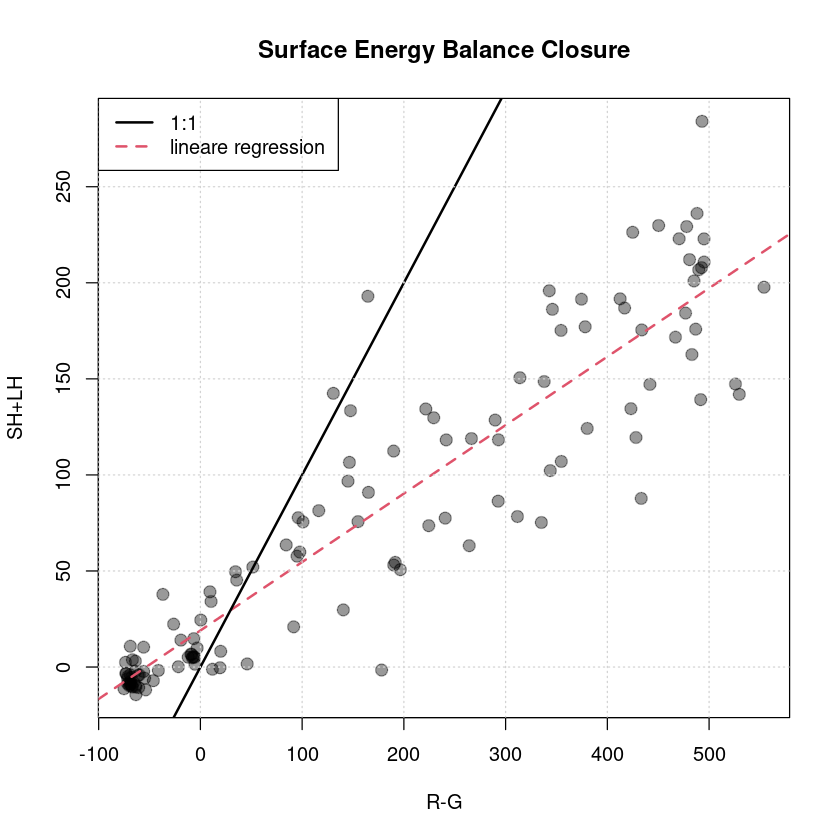

In [4]:
plot_seb(dat$swin,dat$swout,dat$lwin,dat$lwout,dat$sh,dat$lh,dat$shf1)


## Hydrological measures: Bowen ratio and evaporative fraction
The Bowen ratio $BR$ and the evaporative fraction $EF$ are given by
$$
    BR:= \frac{SH}{LH}\quad\quad\textrm{and}\quad\quad EF:= \frac{LH}{LH+SH}
$$
and are both a way to describe the heat transfer by sensible vs latent heat. They are related to the surface and the water abundance therein, and can be used to compare different surface types in different climates. Therefore, it is usually applied on monthly, seasonal or annual averages (so here just exemplarily calculated on daily basis).

In [5]:
print(paste("BR (average):", calc_br(mean(dat$sh,na.rm=TRUE),mean(dat$lh,na.rm=TRUE))))
print(paste("EF (average):", calc_ef(mean(dat$sh,na.rm=TRUE),mean(dat$lh,na.rm=TRUE))))

[1] "BR (average): 1.21550693244542"
[1] "EF (average): 0.451363967927749"


## Meteorological contextualization
For the meteorological contextualization and related unit conversion, Reddy provides several basic function:
- saturation vapor pressure (`calc_satvaporpressure`)
- vapor pressure deficit (`calc_vpd`)
- potential temperature (`calc_theta`)
- virtual temperature (`calc_Tv`)
- convert pressure to height (`pres2height`)
- convert relative to specific humidity (`rh2q`)
- convert relative to absolute humidity (`rh2ah`)
- convert absolute to relative humidty (`ah2rh`)
- clear-sky index (`calc_csi`)
- wind-related functions (`calc_windDirection, calc_windSpeed2D, calc_windSpeed3D, calc_gustfactor`)

The clear-sky index is especially suitable to contextualize the surface energy balance:
The turbulent fluxes are mainly driven by the available energy through incoming solar and longwave radiation, which is in the atmosphere attenuated by clouds in a complex way, depending on cloud height and type. A way to estimate the cloud cover without directly measuring it is the clear sky-index.
Based on longwave incoming radiation, temperature and humidity, an estimate of the clear-sky-index (CSI) can be derived as ratio of actual emissivity $\epsilon_{actual}$ and theoretical (clear-sky) emissivity $\epsilon_{theoretical}$. If $\epsilon_{actual} \le \epsilon_{theoretical}$, i.e. $CSI \le 1$, then the sky is assumed to be clear-sky (see e.g. the review paper @Lehner2021).

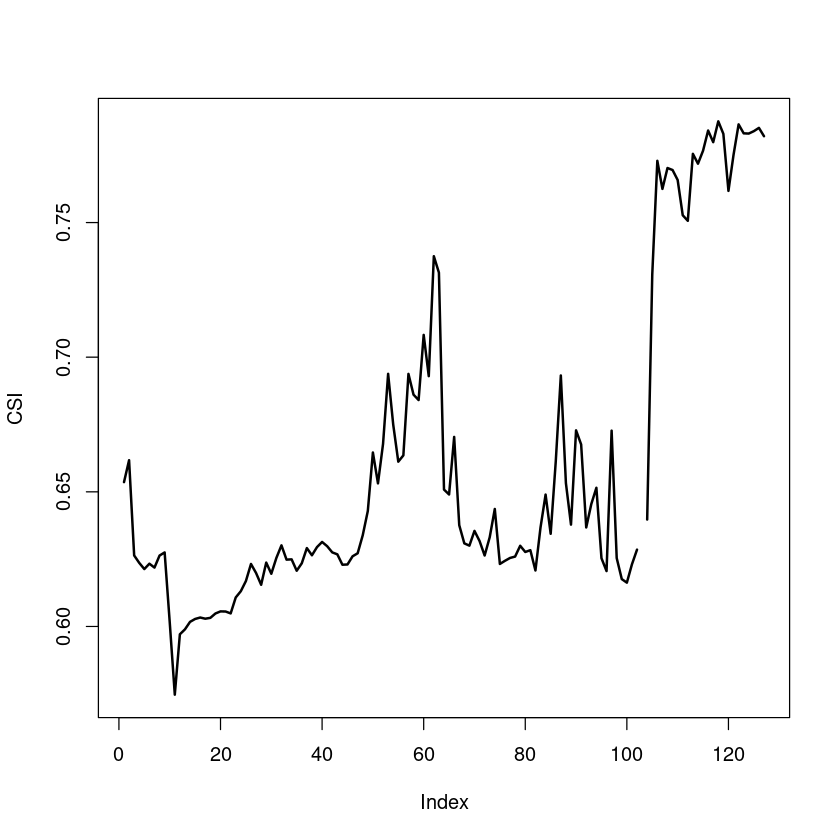

In [7]:
dat$csi=calc_csi(dat$T_mean+273.15,dat$lwin,dat$rh)
plot(dat$csi,type="l",lwd=2,ylab="CSI")